# <span style='color:dodgerblue; font-weight:bold;'> Titanic - Machine Learning from Disaster </span>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### <span style='color:aqua; font-weight:bold;' id='import'> Import Packages and Load the data</span> 

In [34]:
# Essentials
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Misc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
test = pd.read_csv('./dataset/test.csv')
train = pd.read_csv('./dataset/train.csv')

### <span style='color:aqua; font-weight:bold;' id='eda'> Exploratory Data Analysis</span> 

In [36]:
train.shape

(891, 12)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
train.dtypes.value_counts() # data types of the training dataset.

int64      5
object     5
float64    2
dtype: int64

In [41]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### <span style='color:aqua; font-weight:bold;' id='miss'> Missing Values </span> 

In [42]:
train.isnull().sum() #check if there is any null value in the dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# Cabin impute using 'NA'
train['Cabin'] = train['Cabin'].fillna('NA') 
# Embarked impute using mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
# Age impute using mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

### <span style='color:aqua; font-weight:bold;' id='corr'> Correlation </span> 


In [44]:
correlation = train.corr() #find the correlation
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


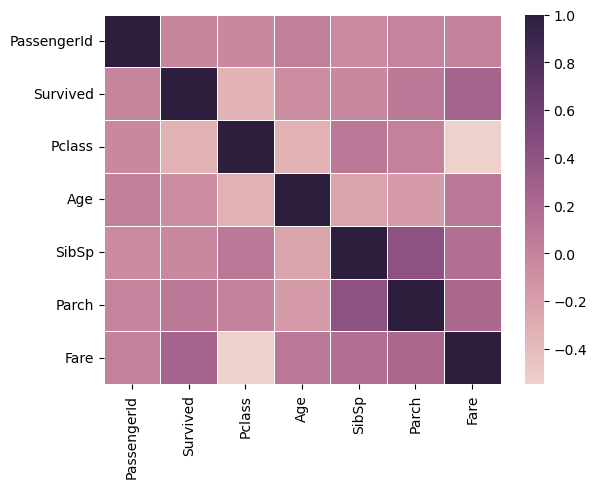

In [45]:
plt.figure() #plot the heatmap for the correlation
sns.heatmap(correlation,fmt=".5f", linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True)) 
plt.show() #the more darker color the more stronger correlation.

### <span style='color:aqua; font-weight:bold;' id='plot'> Plot relationship between variables</span> 

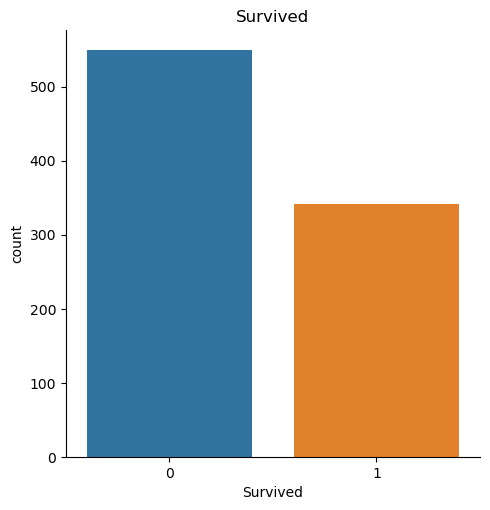

In [46]:
# Survived
sns.catplot(x='Survived', data=train, kind='count').set(title='Survived')
plt.show()

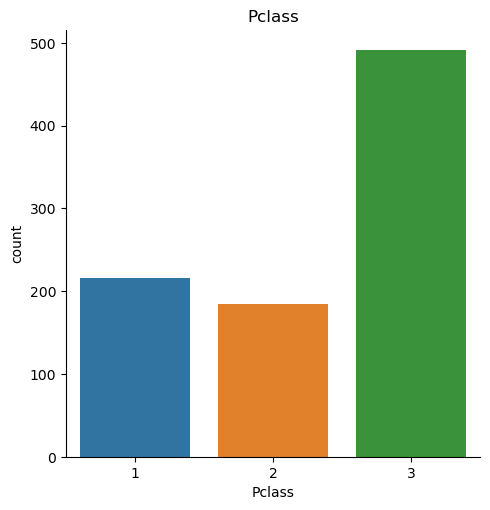

In [47]:
sns.catplot(x='Pclass', data=train, kind='count').set(title='Pclass')
plt.show()

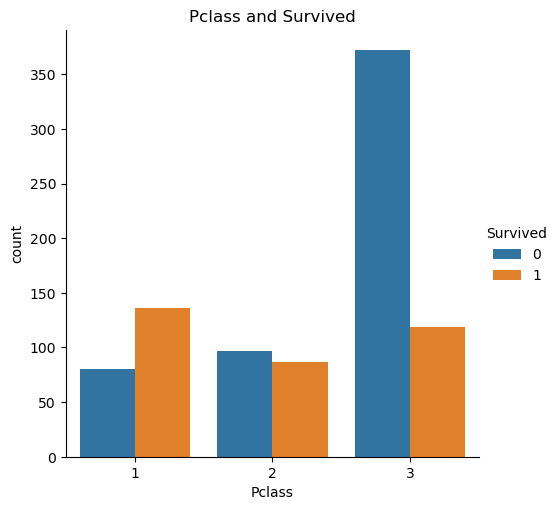

In [48]:
sns.catplot(x='Pclass', hue='Survived', data=train, kind='count').set(title='Pclass and Survived')
plt.show()

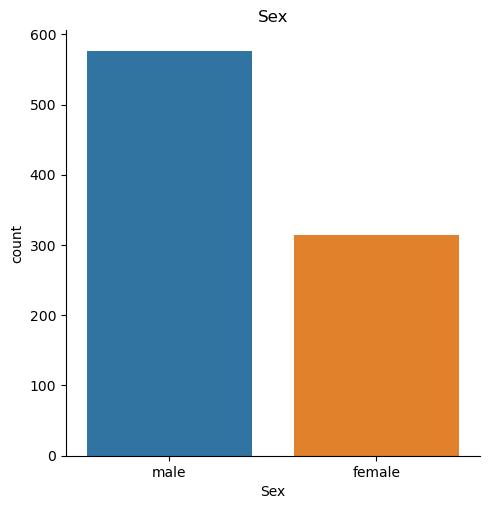

In [49]:
sns.catplot(x='Sex', data=train, kind='count').set(title='Sex')
plt.show()

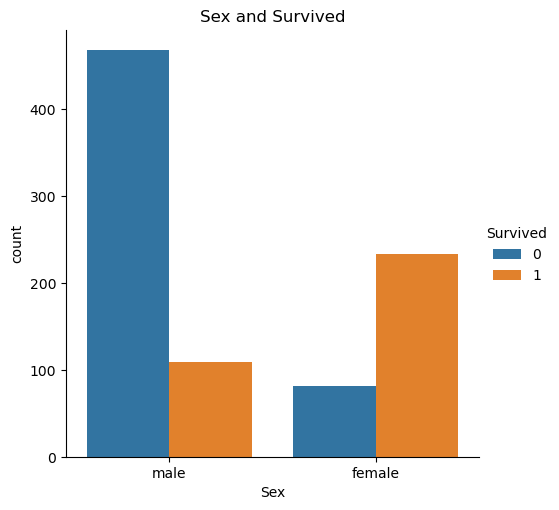

In [50]:
sns.catplot(x='Sex', hue='Survived', data=train, kind='count').set(title='Sex and Survived')
plt.show()

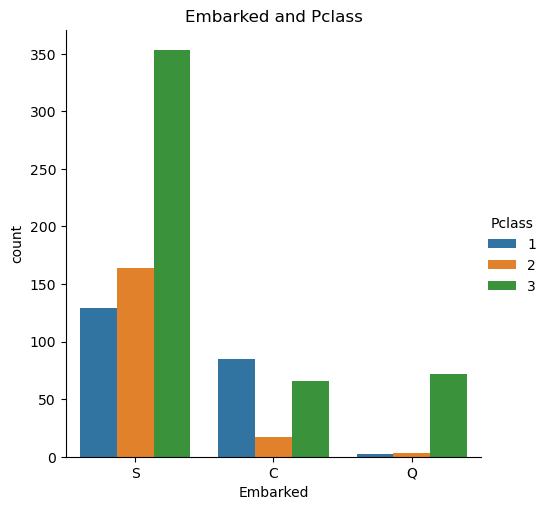

In [51]:
# Embarked
sns.catplot(x='Embarked', hue='Pclass', data=train, kind='count').set(title='Embarked and Pclass')
plt.show()

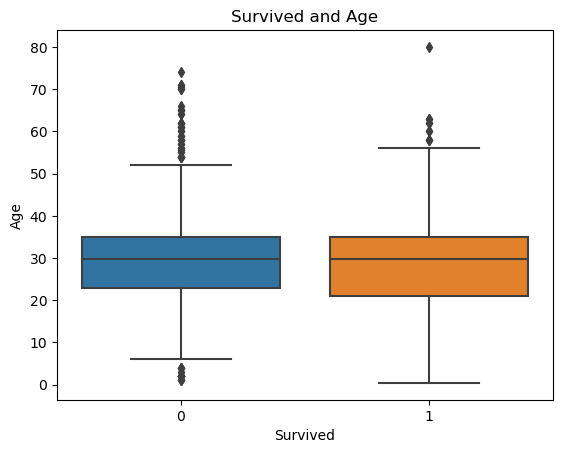

In [52]:
# Survived and Age
sns.boxplot(x='Survived', y='Age', data=train).set(title='Survived and Age')
plt.show()

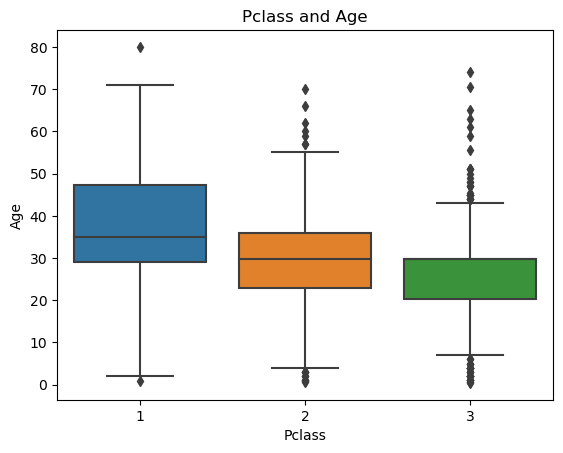

In [53]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=train).set(title='Pclass and Age')
plt.show()

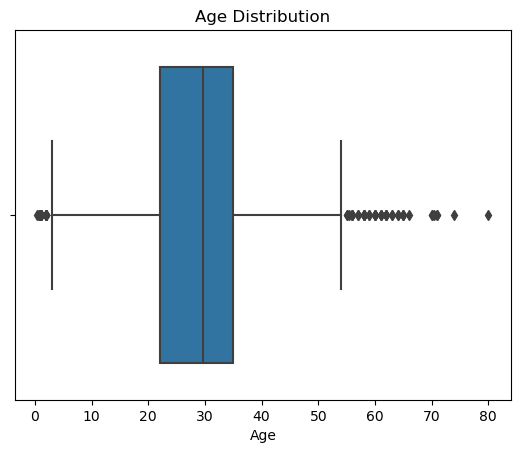

In [54]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=train).set(title='Age Distribution')
plt.show()

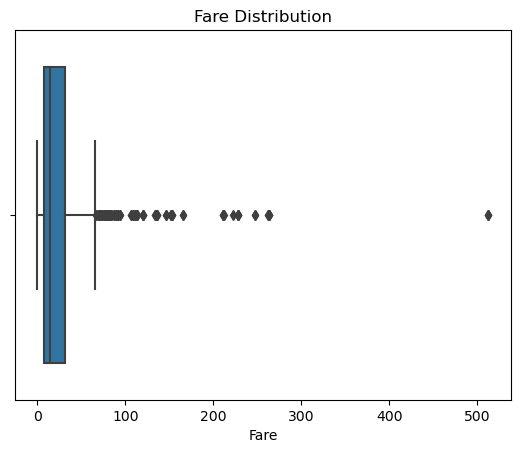

In [55]:
# checking Fare for distribution and outliers
sns.boxplot(x='Fare', data=train).set(title='Fare Distribution')
plt.show()

### <span style='color:aqua; font-weight:bold;' id='miss'> Remove or Convert categorical variables </span> 

In [56]:
# Create dummy variables for the Sex column
dummies = pd.get_dummies(train[["Sex","Cabin", "Embarked"]], drop_first=True)

# Add the dummy variables to the DataFrame
train = pd.concat([train, dummies], axis=1)

# Drop the original Sex column
train = train.drop(["Sex", "Cabin", "Embarked"], axis=1)

In [57]:
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

In [58]:
train.info() # Make sure there is no more Categorical Variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 157 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(5), uint8(150)
memory usage: 179.4 KB


### <span style='color:aqua; font-weight:bold;' id='split'> Splitting the data </span> 

In [59]:
X = train.iloc[:,:-1].values
y = train['Survived'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style='color:aqua; font-weight:bold;' id='norm'> Data normalization </span> 

In [60]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <span style='color:dodgerblue; font-weight:bold;' id='model'> Machine Learning models </span>

### <span style='color:aqua; font-weight:bold;'> K-Nearest Neighbors </span> 

Accuracy: 0.994413407821229
Precision: 1.0
Recall: 0.9864864864864865
F1 Score: 0.9931972789115647


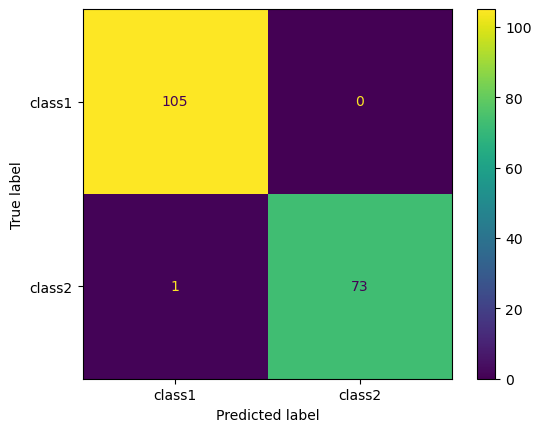

In [61]:
# Create a K-Nearest Neighbors Classifier object
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = knn.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
plot_confusion_matrix(knn, X_test, y_test, display_labels=["class1", "class2"])

### <span style='color:aqua; font-weight:bold;'> Random Forest </span> 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


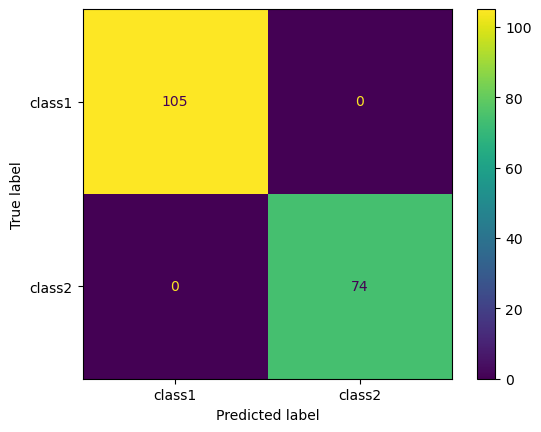

In [62]:
# Create a RandomForestRegressor object with default hyperparameters
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = rf.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
plot_confusion_matrix(rf, X_test, y_test, display_labels=["class1", "class2"])

### <span style='color:aqua; font-weight:bold;' id='plot'> Decision Trees </span> 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


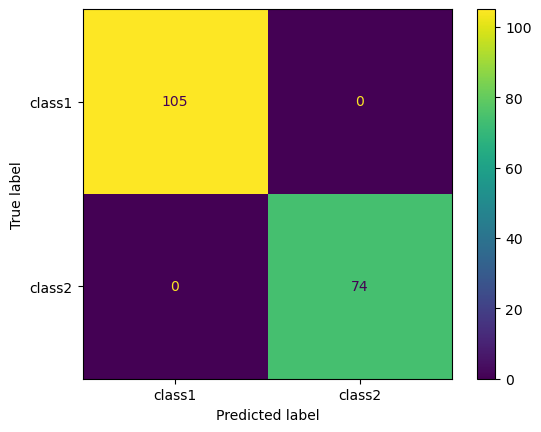

In [63]:
# Create a Decision Tree Classifier object
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = dt.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
plot_confusion_matrix(dt, X_test, y_test, display_labels=["class1", "class2"])

### <span style='color:aqua; font-weight:bold;'> Naive Bayes </span> 

Accuracy: 0.9832402234636871
Precision: 0.9733333333333334
Recall: 0.9864864864864865
F1 Score: 0.9798657718120806


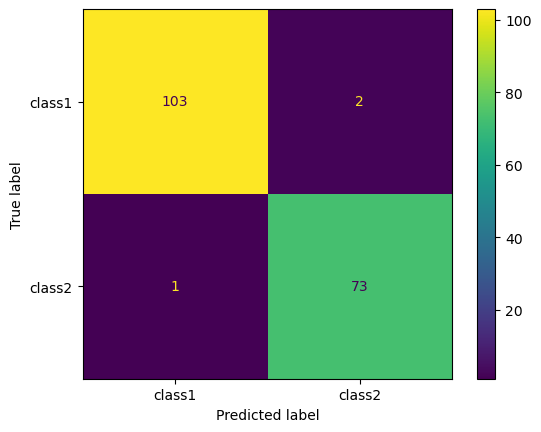

In [64]:
# Create a Gaussian Naive Bayes object
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = nb.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
plot_confusion_matrix(nb, X_test, y_test, display_labels=["class1", "class2"])

### <span style='color:aqua; font-weight:bold;' id='plot'> Gradient Boosting </span>

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


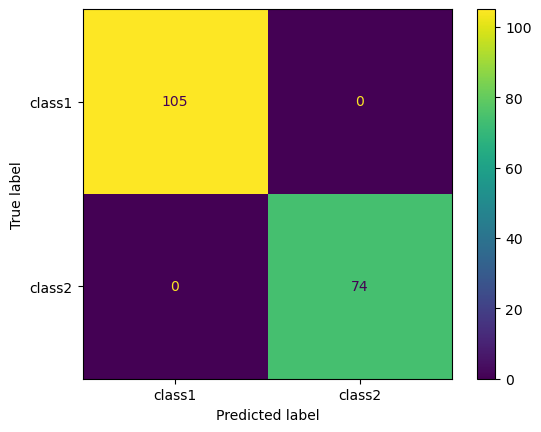

In [65]:
# Create a Gradient Boosting Classifier object
gb = GradientBoostingClassifier()

# Fit the model to the training data
gb.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = gb.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
plot_confusion_matrix(gb, X_test, y_test, display_labels=["class1", "class2"])